In [1]:
# Load the necessary libraries
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from matplotlib import ticker
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import Isomap
from sklearn.utils import shuffle
from sklearn.datasets import load_digits

In [2]:
# Load the digits data
digits = load_digits()
X = pd.DataFrame(digits.data) / 255
y = digits.target

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [4]:
# Build a PCA model with 2 components and fit to training data
pca = PCA(n_components=2, random_state=123)
X_transformed = pca.fit_transform(X_train)

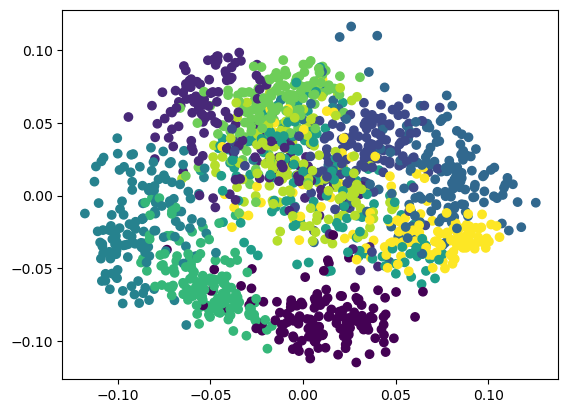

In [5]:
# Plot the PCA mapping
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=np.ravel(y_train), cmap='viridis')

In [6]:
# Build an isomap model and fit to training data
isomap = Isomap(n_components=2, n_neighbors=25)
X_transform_isomap = isomap.fit_transform(X_train)

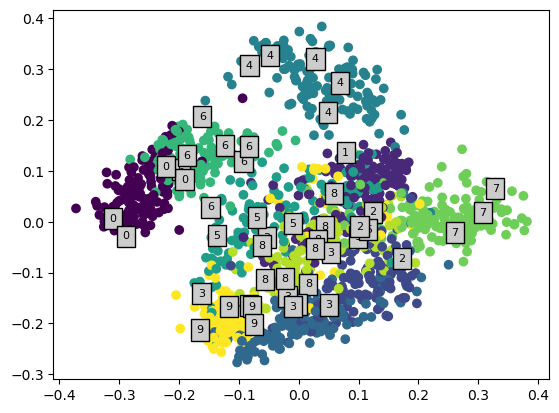

In [7]:
# Plot the isometric mapping
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transform_isomap[:, 0], X_transform_isomap[:, 1], c=np.ravel(y_train), cmap='viridis')
# Add labels 0-9
count=0
for label , x, y in zip(y_train, X_transform_isomap[:, 0], X_transform_isomap[:, 1]):
    if count % 30 == 0:
        plt.annotate(str(int(label)),xy=(x,y), color='black', size=8,bbox=dict(boxstyle='square,pad=0.5', fc='0.8'))
    count = count + 1

In [8]:
# Display the data points in lower-dimensional space
pd.DataFrame(isomap.embedding_)

,0,1
0,0.038365,-0.016337
1,0.011197,0.083521
2,-0.100003,-0.265611
3,0.071619,-0.153085
4,0.173051,0.028331
...,...,...
1432,-0.222872,0.100360
1433,0.042919,-0.179546
1434,-0.090699,-0.193482
1435,-0.024527,0.105265


In [9]:
# Display the KernelPCA object used in the mapping
isomap.kernel_pca_

KernelPCA(kernel='precomputed', n_components=2)

In [10]:
# Display the geodesic distances in higher-dimensional space
isomap.dist_matrix_

array([[0.        , 0.31328353, 0.36689651, ..., 0.41110249, 0.46761129,
        0.38322697],
       [0.31328353, 0.        , 0.42948965, ..., 0.40147372, 0.39664073,
        0.40119335],
       [0.36689651, 0.42948965, 0.        , ..., 0.26629433, 0.40279072,
        0.18840764],
       ...,
       [0.41110249, 0.40147372, 0.26629433, ..., 0.        , 0.40733419,
        0.10478737],
       [0.46761129, 0.39664073, 0.40279072, ..., 0.40733419, 0.        ,
        0.43295721],
       [0.38322697, 0.40119335, 0.18840764, ..., 0.10478737, 0.43295721,
        0.        ]])

In [11]:
# Display the nearest neighbors object used in the mapping
isomap.nbrs_

NearestNeighbors(n_neighbors=25, radius=None)